Machine Learning & Artificial Intelligence
# **Group Assignment:**
### **PedalPals: Optimizing Bike Sharing Demand Forecasting for the Amsterdam Market**
Professor: Pablo Navarro

Assignment done by: 
- Aikaterini Orlova
- Clara Florindo
- Edgardo Alvarez
- Gebru Abrha
- João André Pinho

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#  **Business Case and Dataset Description**

<center><img src="logo.png"/></center>

**Business Case Description:**

Amsterdam is a city with a thriving cycling culture, making it an ideal location for a bike sharing company to enter the market. **PedalPals**, a small company with limited resources, is considering entering this market, and in order to make the most of this decision, it decided to acquire a dataset on the Amsterdam bike sharing scene from a reputable market research firm, <u>which provided valuable insights of the local market in the year of 2011</u>. After a brief analysis, the PedalPals Machine Learning and AI Engineering Team immediately suggested **estimating demand (regression problem) for the <u>year of 2012**</u> in order to later make informed decisions regarding cash flow estimation and adequate bycicle investment.

**Dataset Description:**

This dataset contains a comprehensive collection of bike sharing data that captures a variety of characteristics that impact bike utilization. Intially, each row represents one hour, with columns including information such as the date, season, year, month, hour, and other pertinent factors. These factors include whether the day is a holiday, what day of the week it is, if it is a working day, and the weather. Additionally, the dataset also includes temperature, "feels-like" temperature, humidity, and wind speed data. The dataset also monitors the number of casual users, registered users, and total number of bike rentals for each hour. By studying this vast amount of data, the team may acquire significant insights into the trends and variables influencing bike sharing demand, which can then be used to make sound business decisions.

**Attribute Information:**

- `instant`: Record index;
- `dteday` : Record date;
- `season` : Season ( 1:spring, 2:summer, 3:fall, 4:winter )
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#  **Resolution**

### **• Libraries and Module Imports:**

Importing the necessary libraries and modules to manipulate and interact with the dataset.

In [284]:
# Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')
import datetime
from dateutil import relativedelta
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from pandas import array
from sklearn.feature_selection import f_classif
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **• Loading the Dataset:**

Loading the purchased Bike Sharing dataset.

In [285]:
# Load the purchased Bike Sharing dataset.

bike_dataset = pd.read_csv("bike-sharing_hourly.csv", index_col=False)

bike_dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART I: Data Cleaning**

### **• Describing the Dataset:**

Describing the purchased Bike Sharing dataset.

In [286]:
# Describe the purchased Bike Sharing dataset in order to get to know the data.

print(bike_dataset.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [287]:
# Check the Bike Sharing dataset information (attribute types).

bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### **• Detecting Null Values:**

Checking if there are any null values in the Bike Sharing dataset.

In [288]:
# Check if there are null values.

bike_dataset.isna().astype(int).sum()

# Checked: There are no null values for any of the column attributes.

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### **• Detecting Duplicated Entries:**

Checking if there are duplicated entries in the Bike Sharing dataset.

In [289]:
# Check if there are any Duplicated Entries.
bike_dataset.duplicated().sum()

# Checked: No entries are duplicated.

0

### **• Dealing with Datatypes:**

Changing the `dteday` type to datetime, for dataset manipulation purposes, and setting it as an index. 

Creating a `day` of month variable to make it easy to identify time patterns.

In [290]:
# Change 'dteday' datatype.
bike_dataset['dteday'] = bike_dataset['dteday'].astype('datetime64[ns]')

# Create a new 'day' of the month variable.
bike_dataset['day'] = bike_dataset.dteday.dt.day

# Set 'dteday' as index.
bike_dataset = bike_dataset.set_index('dteday')

# Check the new dataframe.
bike_dataset.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


### **• Creating an Evaluation Dataset:**

In order to mimic the historical data (from 2011) acquired by PedalPals, all data entries from 2012 will be deleted from the primary DataFrame and saved as an evaluation dataFrame for subsequent projections of the market demand for 2012.

In [291]:
# Creating the evaluation DataFrame with all the 2012 values.

dateStart = '2012-01-01'
dateEnd = '2012-12-31'


eval_2012_bike = bike_dataset.loc[(bike_dataset.index >= dateStart) & (bike_dataset.index <= dateEnd)]

In [292]:
# Removing all entries with a year higher than 2011, in order to mimic the historical data that was purchased by the company regarding the year of 2011.

bike_dataset = bike_dataset[bike_dataset.index.year <= 2011]

In [293]:
bike_dataset

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-31,8641,1,0,12,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,73,92,31
2011-12-31,8642,1,0,12,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,63,71,31
2011-12-31,8643,1,0,12,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,50,52,31


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART II: Exploratory Analysis**

### **• Defining the Categorical and Numerical Variables:**

Organizing the different values in these 2 categories in order to facilitate the dataset manipulation.

In [82]:
categorical_variables = ["season", "holiday", "workingday", "weathersit", "yr", "mnth", "day","hr",'weekday']
numerical_variables = ["temp", "atemp", "hum", "windspeed"]

### **• Dealing with Outliers:**

Identifying and addressing the data points that significantly deviate from the typical values observed in the dataset for the `cnt` variable. Outliers can skew analysis results which can have an impact in the performance of predictive models. 

In [83]:
# Plotting the distribution for "cnt" values.
px.box(bike_dataset, y="cnt", color_discrete_sequence=['#00b894'], title='Box Plot of Shared Bike Rentals')

# Checked: There are a few values of `cnt` that lie well above the average, hence these should be dealt with.

In [84]:
# Checking the entry values that are above 3rd + IQR * 1.5.

IQR = bike_dataset.cnt.quantile(0.75) - bike_dataset.cnt.quantile(0.25)
upper_fence = bike_dataset.cnt.quantile(0.75) + (IQR * 1.5)
outliers = bike_dataset[bike_dataset["cnt"] > upper_fence]

outliers


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-08-23,5537,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651,23
2012-03-12,10359,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644,12
2012-03-12,10360,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712,12
2012-03-13,10383,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676,13
2012-03-13,10384,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-11,16886,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724,11
2012-12-12,16910,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688,12
2012-12-13,16934,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679,13


In [85]:
# Check the % of entries that constitutes outliers in order to think on how to address them.

print(f"These outlier entries represent {round((len(outliers)/len(bike_dataset))*100, ndigits=2)}% of the total data.")

# Checked: Since the percentage share of outliers from the total data is so low, these entries can be removed. 

These outlier entries represent 2.91% of the total data.


In [86]:
# Removing the outliers.
bike_dataset = bike_dataset.loc[bike_dataset.cnt <= upper_fence, :]

bike_dataset

# Checked: The oulier values for the `cnt` attribute were deleted.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31


### **• Distribution Plotting:**

Plotting the distribution of distinct data variables (particularly continuous variables) allows for a clearer representation of the magnitude and range of each variable, as well as determining whether or not they require normalization. 

Given that some machine learning algorithms are sensitive to the scale of input characteristics, this normalization may be necessary on occasion in order to improve models performance.

<Axes: ylabel='Density'>

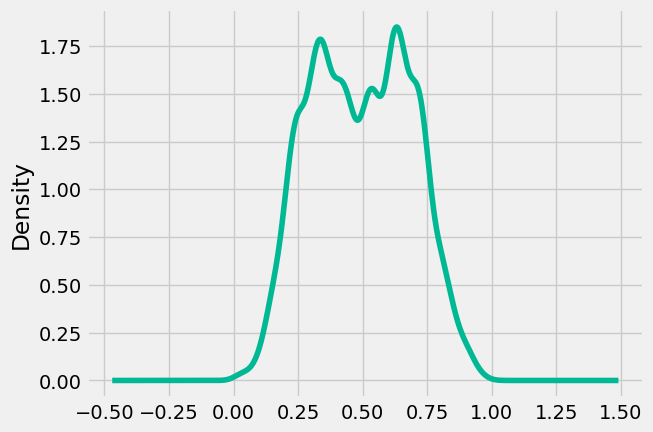

In [87]:
# Plotting the data distribution for the 'temp' feature.

bike_dataset['temp'].plot(kind='density', color='#00b894')

<Axes: ylabel='Density'>

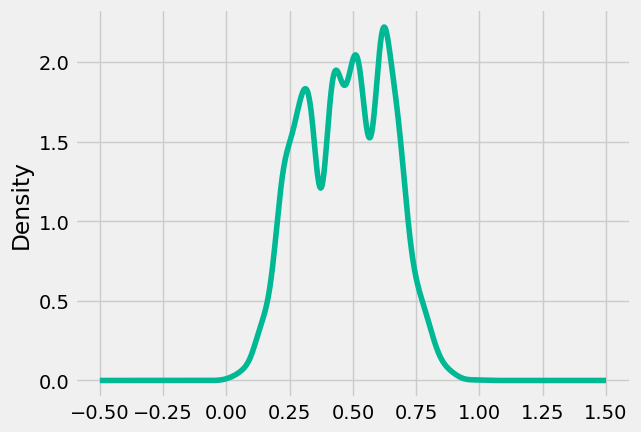

In [88]:
# Plotting the data distribution for the 'atemp' feature.

bike_dataset['atemp'].plot(kind='density', color='#00b894')

<Axes: ylabel='Density'>

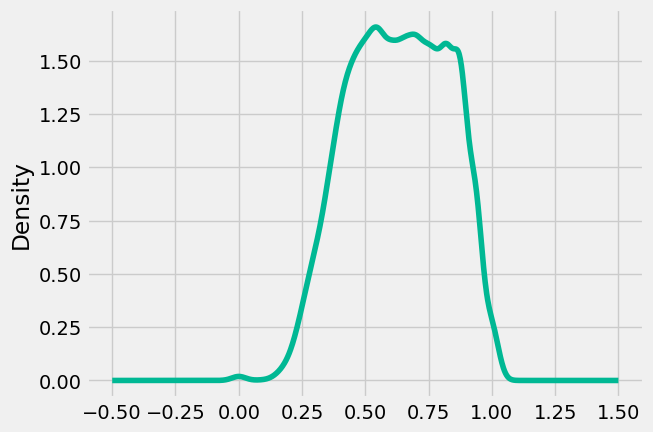

In [89]:
# Plotting the data distribution for the 'hum' feature.

bike_dataset['hum'].plot(kind='density', color='#00b894')

<Axes: ylabel='Density'>

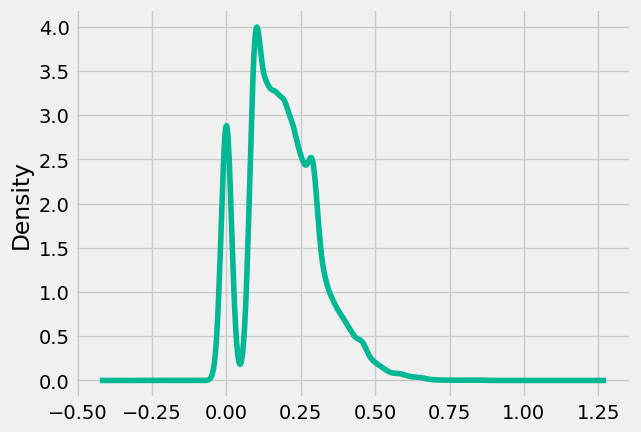

In [90]:
# Plotting the data distribution for the 'windspeed' feature.

bike_dataset['windspeed'].plot(kind='density', color='#00b894')

**Insights**: According to the plottings, the `tem`,`atemp`, `hum`, and `windspeed` features are already fairly normalized and don't clearly show outliers, thus their values will be retained as is for the time being.

### **• Data Exploration Plotting:**

Plotting bike usage across user types and other relationships between average bike demand and different dataset features to gain insights into existing demand patterns and feature relevance.

**- Evolution of Total Rented Bikes per Day Segmented by User Type:**

1. Defining a DataFrame 'dfUser' to plot analysis between different `userType`, where each instant is duplicated for casual/registerd users where `cnt` corresponds to the number of bikes rented by each type.

In [91]:
# Creating a new dataframe with a 'userType' additional column as casual.
dfCasual = bike_dataset.copy().reset_index()
dfCasual['userType'] = 'casual'

# Creating a new dataframe with a 'userType' additional column as registered.
dfReg = bike_dataset.copy().reset_index()
dfReg['userType'] = 'registered'

# Merging these two dataframes with an outer join.
dfUser = pd.merge(dfCasual, dfReg, how='outer')

# Assigning the value of the casual count to the 'cnt' column for all rows in the 'dfUser' dataframe where the 'userType' column equals "casual".
dfUser.loc[dfUser.userType == 'casual', 'cnt'] = dfUser['casual']
# Assigning the value of the registered count to the 'cnt' column for all rows in the 'dfUser' dataframe where the 'userType' column equals "registered".
dfUser.loc[dfUser.userType == 'registered', 'cnt'] = dfUser['registered']

# Removing unecessary columns and displaying the first rows of the resulting dataframe.
dfUser = dfUser.drop(['casual','registered'], axis=1)
dfUser.sort_values(by='instant').head(6)


,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,userType
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,1,casual
16874,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,1,registered
16875,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,registered
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,1,casual
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,1,casual
16876,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,1,registered


2. Plotting the evolution of total rented bikes per day segmented by user type.

In [92]:
# Plotting the evolution of total rented bikes per day segmented by user type.

px.histogram(dfUser, x='dteday', y="cnt", color='userType', color_discrete_sequence = ['darkblue', '#00b894'], title='Total Rented Bikes per Day - Segmented by User Type')

**Insight**: As it can be seen, registration appears to be extremely effective, as the majority of renting bike occurences appear to belong to the 'registered' user type.

**- Average Usage of Shared Bikes for Categorical Variables:**

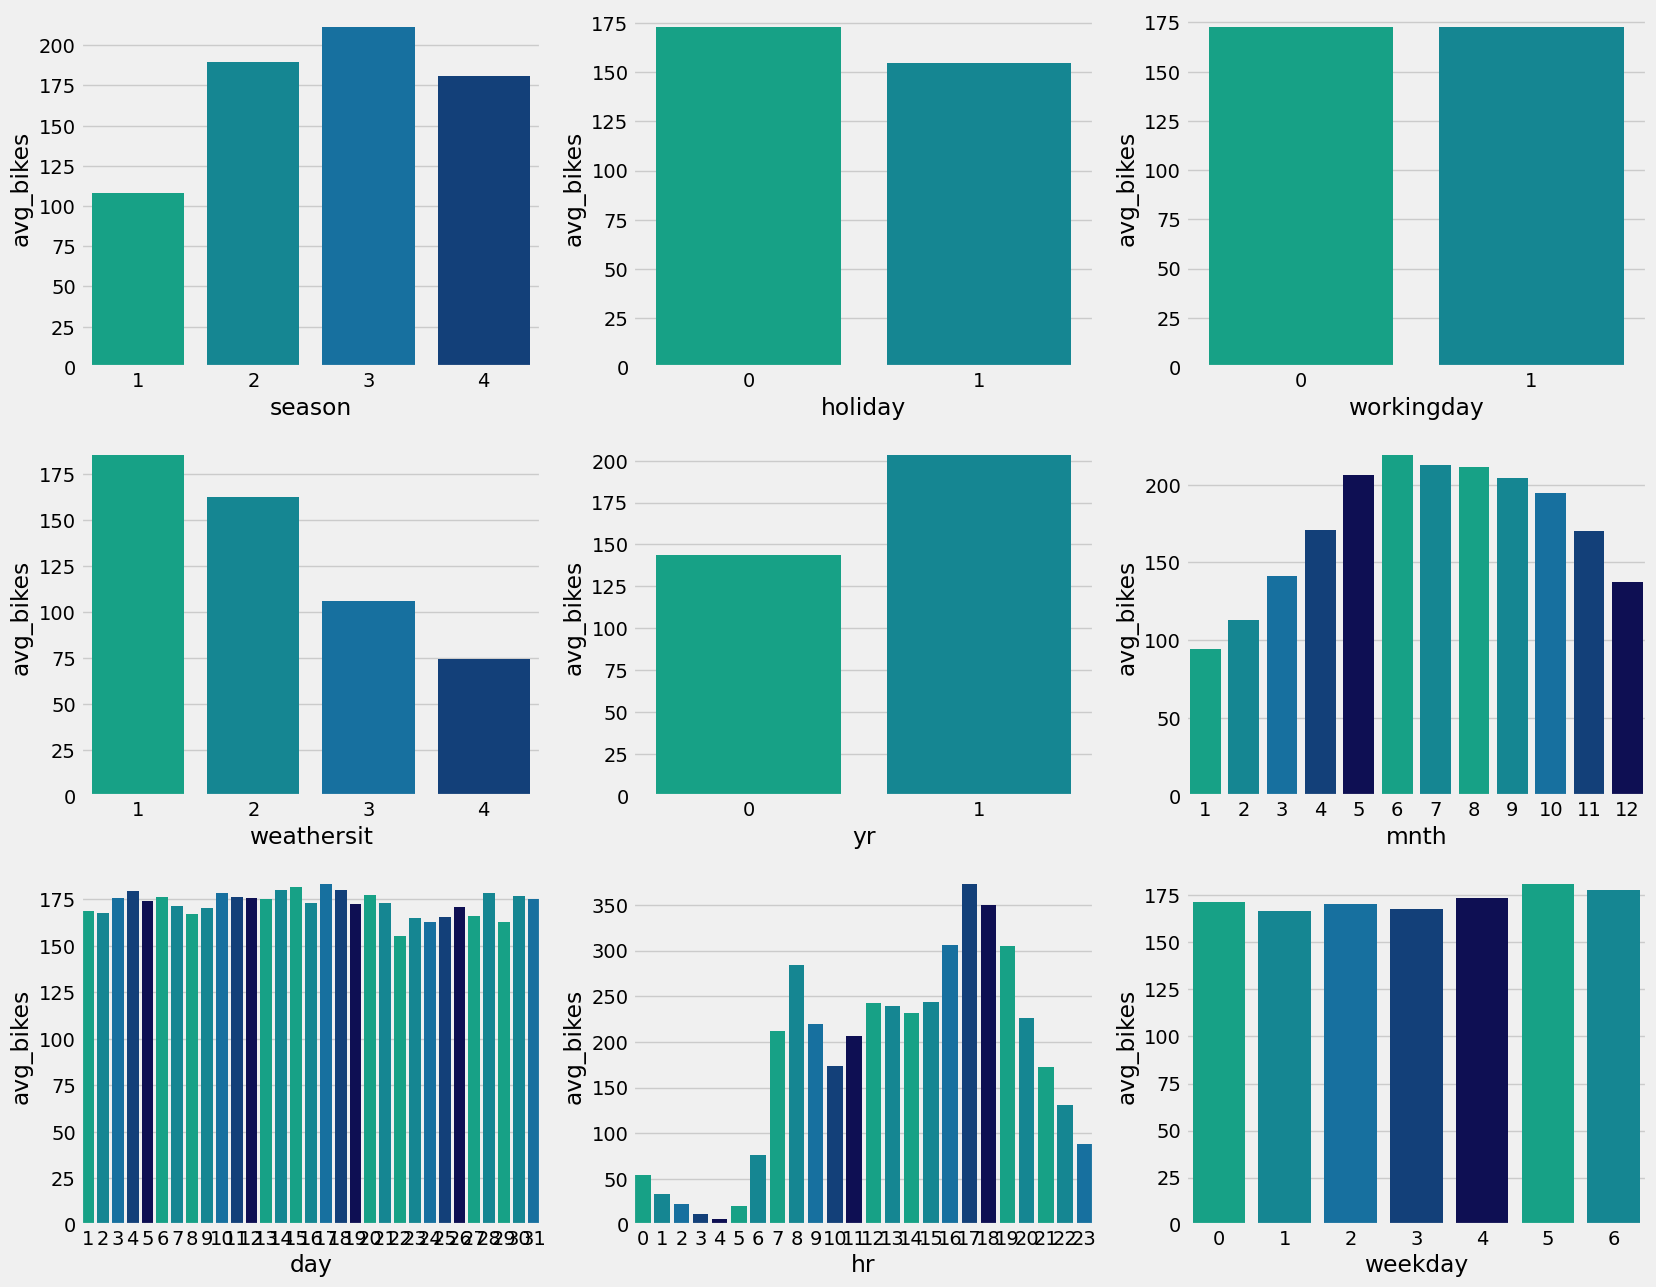

In [93]:
# Defining the graphs coloring settings.
n_colors = 7
palette = sns.color_palette(["#00b894", "#0097a7", "#0077b6", "#023e8a", "#03045e"], n_colors=n_colors)

# Plotting the average usage of shared bikes for categorical variables.
fig, ax = plt.subplots(3, 3, figsize=(18, 15))

for i in range(len(categorical_variables)):
    var = categorical_variables[i]
    sns.barplot(ax=ax[int(i/3), i-int(i/3)*3], data=bike_dataset.groupby(var, as_index=False)["cnt"].mean().rename({"cnt":"avg_bikes"}, axis=1), 
                x=var, y="avg_bikes", palette=palette)

**Main Insights:**

- **Season:** The highest average shared bike rentals occur during Summer (2) and Fall (3).
- **Working Day:** The average number of shared bikes rented is nearly the same during working (1) and non working (0) days.
- **Weather Sit:** As expected, days with better weather conditions register more bike rentals.
- **Hour:** In terms of bike rentals, it appears that there are two peaks, from 7h to 9h and from 16h to 19h.

**- Average Usage of Shared Bikes for Numerical Variables:**

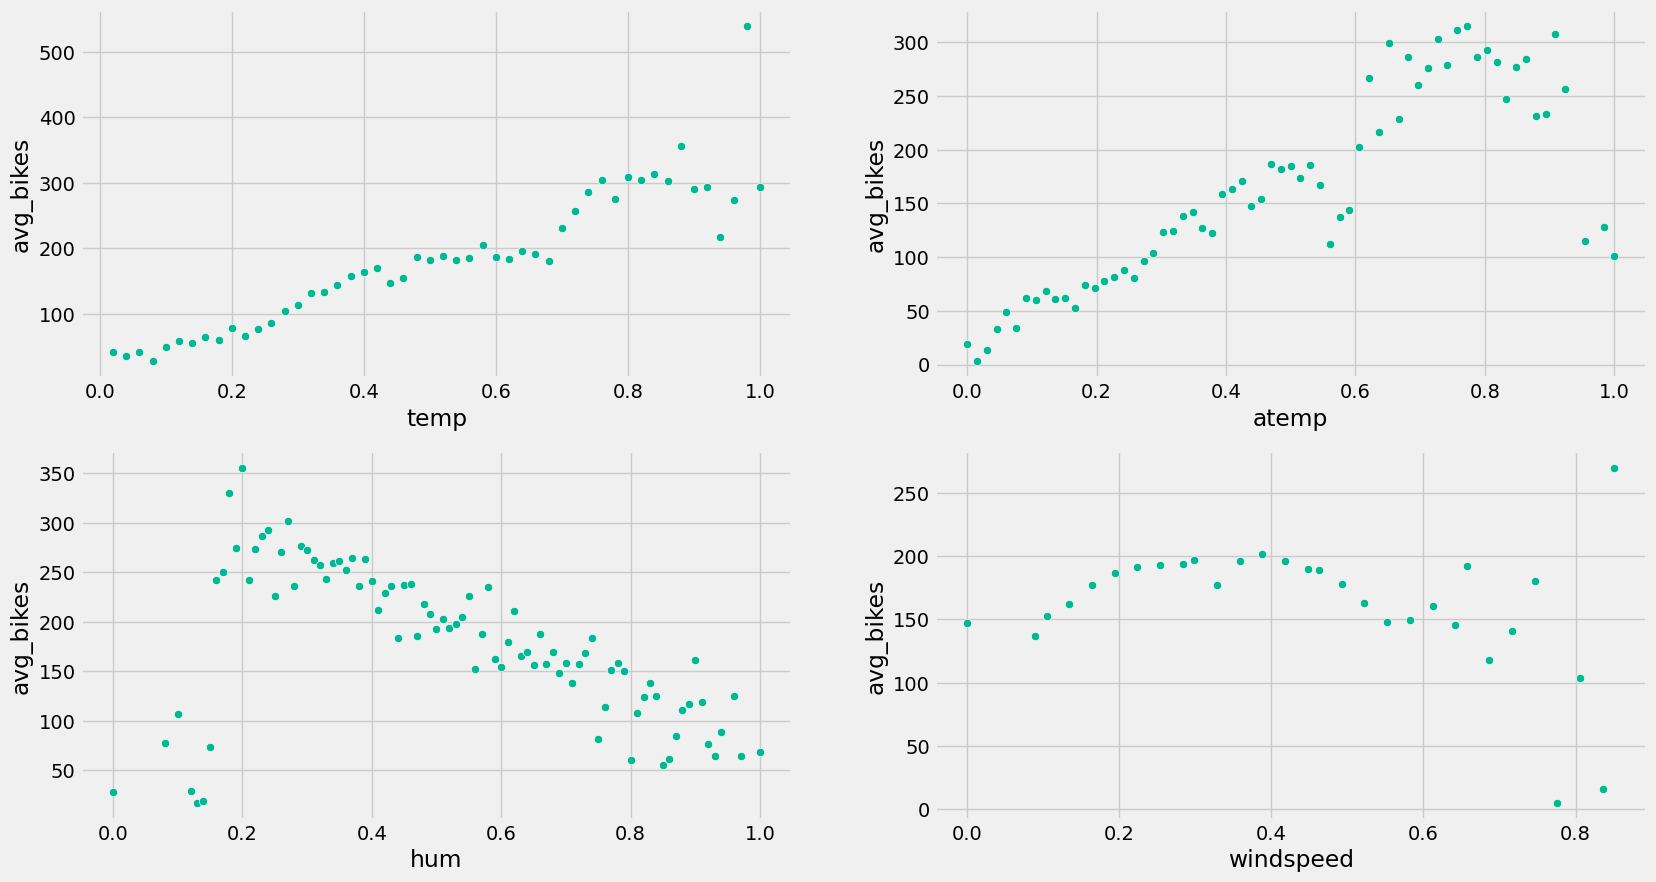

In [94]:
# Plotting the average usage of shared bikes for numerical variables.

fig, ax = plt.subplots(2,2, figsize=(18,10))

for i in range(len(numerical_variables)):
    var = numerical_variables[i]
    sns.scatterplot(ax=ax[int(i/2),i-int(i/2)*2], data=bike_dataset.groupby(var,as_index=False)["cnt"].mean().rename({"cnt":"avg_bikes"},axis=1), x=var, y="avg_bikes", color='#00b894')

**Main Insights:**

- **Temp and Atemp:** Higher temperatures or temperatures feeling typically generate more bike rentals.
- **Humidity:** There is a negative correlation betwween humidity levels and average shared bike rents.

**- Average Usage of Shared Bikes per Hour Segmented by Working and Not-Working Days:**

In [95]:
# Grouping the data by hour and working day and computing the average number of bike rentals
peakhour = bike_dataset.groupby(["hr", "workingday"], as_index=False)["cnt"].mean()

# Plotting the average number of bike rentals by hour and working day.
fig = px.line(peakhour, x='hr', y='cnt', color='workingday', markers=True,
              color_discrete_sequence=['#00b894', '#023e8a'])
fig.update_layout(title='Average Bike Rentals by Hour and Working Day',
                  xaxis_title='Hour',
                  yaxis_title='Average Bike Rentals')
fig.show()

**Main Insights:**

According to this chart, there is a clear division in consumption per day hour, which is why a new variable `dayInstant` with the following time periods will be created:
- **'morning'** : 6-9h
- **'midday'** : 10-17h
- **'afternoon'** : 18-21h
- **'night'** : 22-5h

In [96]:
# Creating a new variable 'dayInstant' with 4 different time periods.

def dayInstant(hr):
    if 6 <= hr and hr <= 9: return 'morning'
    elif 10 <= hr and hr <= 17: return 'midday'
    elif 18 <= hr and hr <= 21: return 'afternoon'
    else: return 'night'

bike_dataset['dayInstant'] = bike_dataset['hr'].apply(lambda x: dayInstant(x))
dfUser['dayInstant'] = dfUser['hr'].apply(lambda x: dayInstant(x))

In [97]:
bike_dataset

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,dayInstant
dteday,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,night
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,night
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,night
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,night
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31,afternoon
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31,afternoon
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31,afternoon


**- Average Usage of Shared Bikes per Weekday Segmented by Casual and Registered Users:**

In [98]:
# Grouping the data by weekday and user type and computing the average number of bike rentals
weekly = dfUser.loc[dfUser.holiday == 0, :].groupby(["weekday", "userType"], as_index=False)["cnt"].mean()

# Plotting the average number of bike rentals by weekday and user type.
fig = px.bar(weekly, x='weekday', y='cnt', color='userType',
             color_discrete_map={'registered': '#00b894', 'casual': '#023e8a'})
fig.update_layout(title='Average Bike Rentals by Weekday and User Type',
                  xaxis_title='Weekday',
                  yaxis_title='Average Bike Rentals')
fig.show()

**Main Insight:**

Despite the fact that registered users dominate bike rentals during the week, casual users register their highests rental rates on Saturdays and Sundays.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART III: Feature Engineering**

### **• Feature Creation:**

Transforming raw data into new variables, features, or characteristics that can provide additional information, improve model performance, and aid in the identification of patterns and relationships in the data.

**- Percentage of Registered Bikes Over Total Count:**

- `pct_registered` = `registered` / `cnt`

According to the plotted charts, `pct registered` varies significantly depending on some of the categorical variables such as `mnth`, `hr`, or `workingday`, so this feature will be aggregated in the model on a "hourly" and "monthly" basis.

In [99]:
# Adding the percentage of registered bikes over total count feature.

bike_dataset['pct_registered'] = bike_dataset['registered']/bike_dataset['cnt']

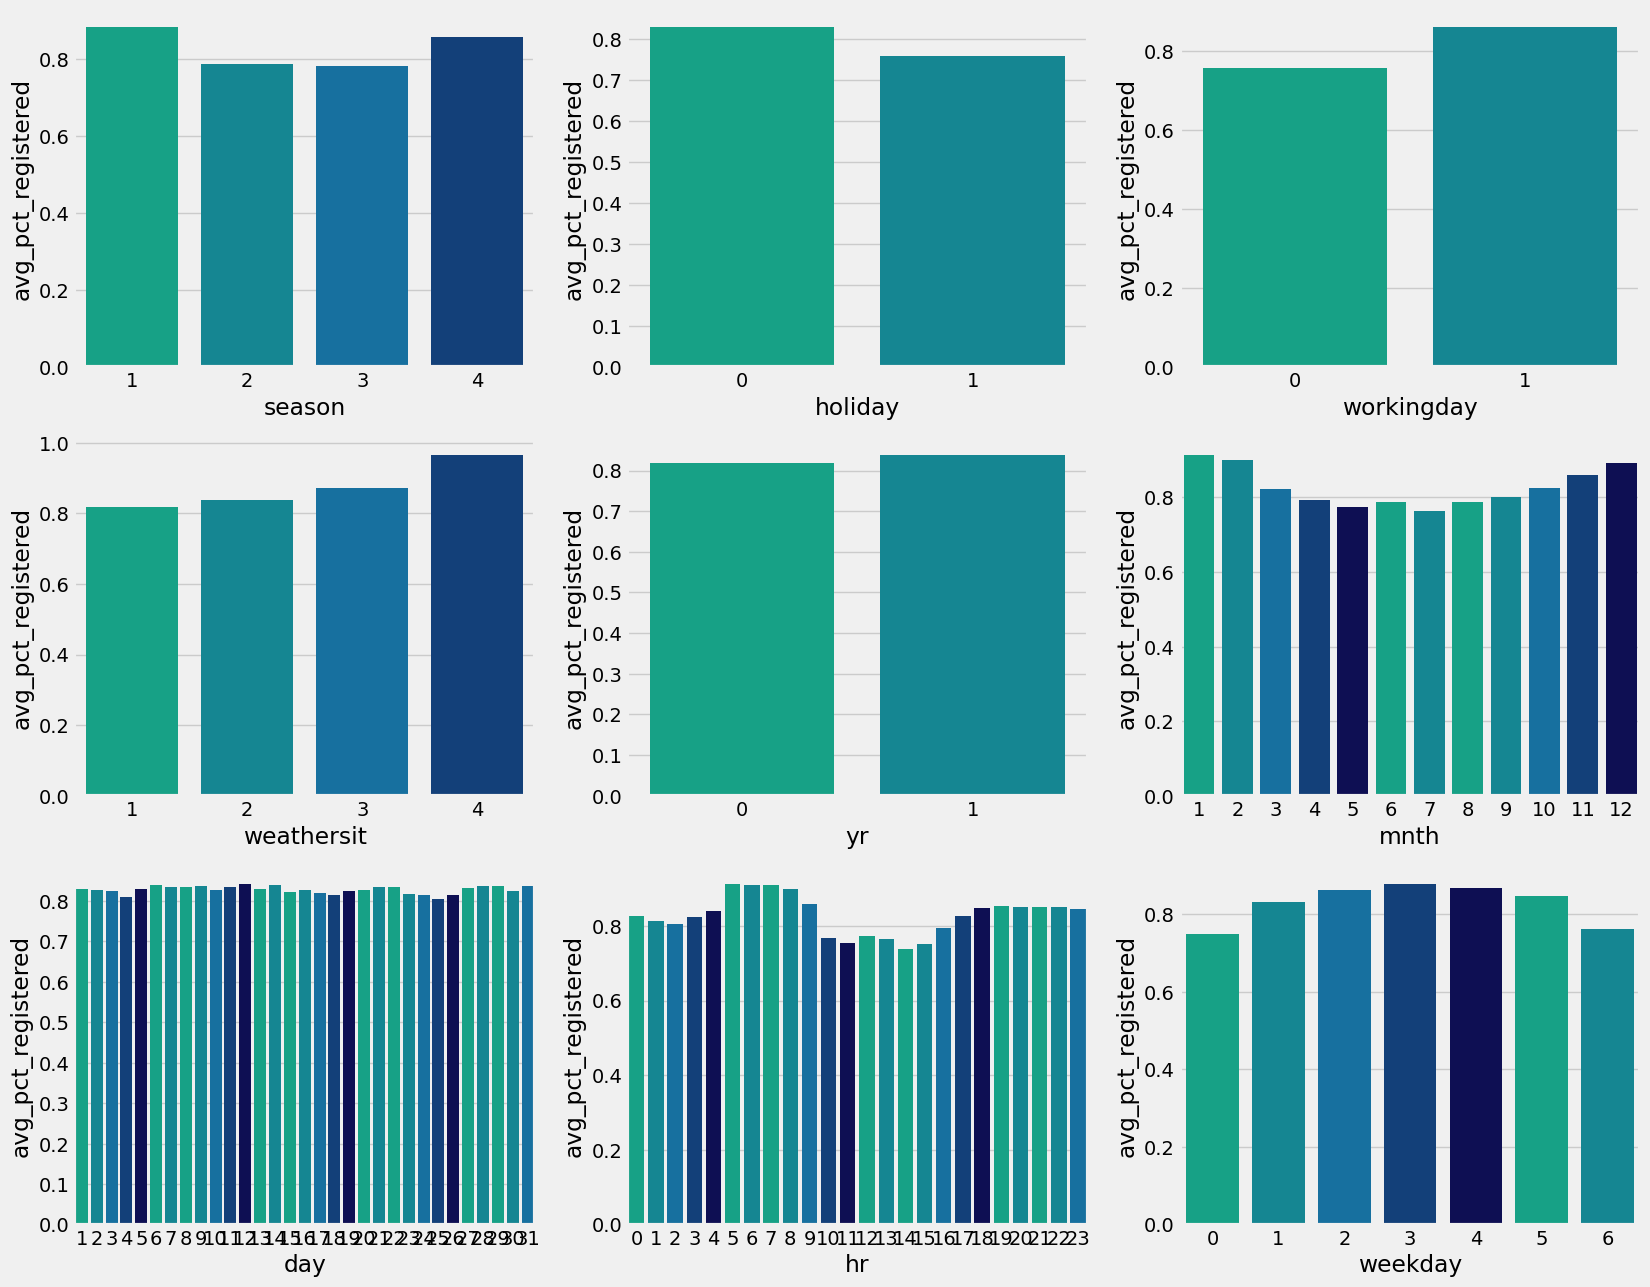

In [100]:
# Defining the graphs coloring settings.
n_colors = 7
palette = sns.color_palette(["#00b894", "#0097a7", "#0077b6", "#023e8a", "#03045e"], n_colors=n_colors)

fig, ax = plt.subplots(3,3, figsize=(18,15))

for i in range(len(categorical_variables)):
    var = categorical_variables[i]
    sns.barplot(ax=ax[int(i/3),i-int(i/3)*3], data=bike_dataset.groupby(var,as_index=False)["pct_registered"].mean().rename({"pct_registered":"avg_pct_registered"},axis=1), x=var, y="avg_pct_registered", palette=palette)

In [101]:
# Aggregating the percentage of registered bikes over total count feature on a hourly basis.
pct_registered_hourly = bike_dataset.groupby('hr')['pct_registered'].mean().to_dict()
bike_dataset['pct_registered_hourly'] = bike_dataset['hr'].map(pct_registered_hourly)

# Aggregating the percentage of registered bikes over total count feature on a monthly basis.
pct_registered_monthly = bike_dataset.groupby('mnth')['pct_registered'].mean().to_dict()
bike_dataset['pct_registered_monthly'] = bike_dataset['mnth'].map(pct_registered_monthly)

In [102]:
# Check the dataset features information.

bike_dataset.info()

# Checked: The new features were successfully added.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16874 entries, 2011-01-01 to 2012-12-31
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 16874 non-null  int64  
 1   season                  16874 non-null  int64  
 2   yr                      16874 non-null  int64  
 3   mnth                    16874 non-null  int64  
 4   hr                      16874 non-null  int64  
 5   holiday                 16874 non-null  int64  
 6   weekday                 16874 non-null  int64  
 7   workingday              16874 non-null  int64  
 8   weathersit              16874 non-null  int64  
 9   temp                    16874 non-null  float64
 10  atemp                   16874 non-null  float64
 11  hum                     16874 non-null  float64
 12  windspeed               16874 non-null  float64
 13  casual                  16874 non-null  int64  
 14  registered           

**- Night and Day Feature:**

The number of rentals varies significantly depending on the day light, according to the plotted charts. There are more rentals during the 'day' than during the 'night,' hence why this is an important variable to include in the model.

- **'night'** : 0
- **'day'** : 1

In [103]:
# Adding the night and day feature.

bike_dataset["day_night"] = bike_dataset['hr'].apply(lambda x: 1 if x >= 7 and x <= 23 else 0)
bike_dataset.groupby('day_night')['cnt'].mean()

day_night
0     32.321736
1    231.842837
Name: cnt, dtype: float64

In [104]:
# Check the dataset.

bike_dataset

# Checked: The new feature was successfully added.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,day,dayInstant,pct_registered,pct_registered_hourly,pct_registered_monthly,day_night
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,...,0.0000,3,13,16,1,night,0.812500,0.826608,0.912713,0
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,...,0.0000,8,32,40,1,night,0.800000,0.813048,0.912713,0
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,...,0.0000,5,27,32,1,night,0.843750,0.804438,0.912713,0
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,...,0.0000,3,10,13,1,night,0.769231,0.824037,0.912713,0
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,...,0.0000,0,1,1,1,night,1.000000,0.838404,0.912713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,...,0.1642,11,108,119,31,afternoon,0.907563,0.852518,0.893173,1
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,...,0.1642,8,81,89,31,afternoon,0.910112,0.851682,0.893173,1
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,...,0.1642,7,83,90,31,afternoon,0.922222,0.851628,0.893173,1


### **• Multivariate Analysis:**

Analyzing and modeling the relationships between multiple variables simultaneously to gain insights into complex systems and identify patterns or trends that may not be visible in univariate analyses.

**- Correlation Checking for Numerical Variables (Pearson Correlation):**

The **Pearson correlation coefficient** is a measure of the linear correlation between two continuous variables, with a value ranging from -1 to 1. A value of one indicates a perfect positive correlation, a value of zero indicates no correlation, and a value of one indicates a perfect negative correlation.

In this case, the Pearson correlation wil be used to <u>determine which features in the correlation DataFrame are most strongly correlated with the target variable "cnt" and among themselves.</u>

1. **Polinomial Features Creation:**

In order to better observe variable interaction and to possibly enrich the model quality, high-order and combination polynomial features will be used for the variables `temp`, `atemp`, `hum`, and `windspeed`. 

This step can be useful in capturing non-linear relationships between variables and the target variable that linear models alone cannot capture.

In [105]:
# Creating the polynomial features using the variables 'temp', 'atemp', 'hum', and 'windspeed'.
correlation = bike_dataset.loc[:,[
    'temp',
    'atemp',
    'hum',
    'windspeed',
]]

poly = PolynomialFeatures(2)

# Using the fit_transform method of the PolynomialFeatures object to generate polynomial features for the columns in 'correlation'.
# Converting the resulting array into a DataFrame with column names obtained from poly.get_feature_names_out.
# Dropping the first column of the resulting DataFrame which contains only ones (redundant).
correlation = pd.DataFrame(poly.fit_transform(correlation), columns=poly.get_feature_names_out(correlation.columns)).drop(['1'], axis=1)

# Adding the target variable 'cnt' from the original dataset to the 'correlation' DataFrame.
# This is done to retain the target variable for correlation analysis.
correlation['cnt'] = bike_dataset.reset_index().loc[:,'cnt']
correlation.head()

,temp,atemp,hum,windspeed,temp^2,temp atemp,temp hum,temp windspeed,atemp^2,atemp hum,atemp windspeed,hum^2,hum windspeed,windspeed^2,cnt
0,0.24,0.2879,0.81,0.0,0.0576,0.069096,0.1944,0.0,0.082886,0.233199,0.0,0.6561,0.0,0.0,16
1,0.22,0.2727,0.80,0.0,0.0484,0.059994,0.1760,0.0,0.074365,0.218160,0.0,0.6400,0.0,0.0,40
2,0.22,0.2727,0.80,0.0,0.0484,0.059994,0.1760,0.0,0.074365,0.218160,0.0,0.6400,0.0,0.0,32
3,0.24,0.2879,0.75,0.0,0.0576,0.069096,0.1800,0.0,0.082886,0.215925,0.0,0.5625,0.0,0.0,13
4,0.24,0.2879,0.75,0.0,0.0576,0.069096,0.1800,0.0,0.082886,0.215925,0.0,0.5625,0.0,0.0,1


2. **Pearson Correlation Results:**

In [106]:
# Computing the Pearson correlation coefficients between all pairs of variables with the 'cnt'.
correlation.corr()['cnt'].sort_values(ascending=False)

cnt                1.000000
temp               0.401579
atemp              0.398330
temp^2             0.397088
temp atemp         0.396587
atemp^2            0.394437
temp windspeed     0.309070
atemp windspeed    0.305103
windspeed          0.097801
temp hum           0.071052
windspeed^2        0.067995
atemp hum          0.053689
hum windspeed     -0.053692
hum               -0.326973
hum^2             -0.328915
Name: cnt, dtype: float64

In [107]:
# Computing the correlation coefficients between all variables in the 'correlation' DataFrame and sort them by correlation with 'cnt'.

correlation = correlation.corr().sort_values('cnt', ascending=False)

# Converting the correlation matrix to a NumPy array.
zz = np.array(correlation)

# Creating an annotated heatmap of the correlation matrix.
fig = ff.create_annotated_heatmap(
    zz,
    x = list(correlation.columns),
    y = list(correlation.index),
    annotation_text = np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale= 'Greens'
)

# Setting the size of the heatmap figure.
fig.update_layout(
    height=800,
    width = 800
)

**Main Insight:**

Given the correlation matrix results, and the high risk of multicollinearity that some of the added polynomial features presented only **'temp*windspeed'** and **'hum^2'** will be included in the DataFrame.

In [108]:
# Adding the 'temp*windspeed' and 'hum^2' features to the DataFrame.

bike_dataset['temp*windspeed'] = bike_dataset['temp']*bike_dataset['windspeed']
bike_dataset['hum^2'] = np.square(bike_dataset['hum'])

In [109]:
# Check the dataset.

bike_dataset

# Checked: The new features were successfully added.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,day,dayInstant,pct_registered,pct_registered_hourly,pct_registered_monthly,day_night,temp*windspeed,hum^2
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,...,13,16,1,night,0.812500,0.826608,0.912713,0,0.000000,0.6561
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,...,32,40,1,night,0.800000,0.813048,0.912713,0,0.000000,0.6400
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,...,27,32,1,night,0.843750,0.804438,0.912713,0,0.000000,0.6400
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,...,10,13,1,night,0.769231,0.824037,0.912713,0,0.000000,0.5625
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,...,1,1,1,night,1.000000,0.838404,0.912713,0,0.000000,0.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,...,108,119,31,afternoon,0.907563,0.852518,0.893173,1,0.042692,0.3600
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,...,81,89,31,afternoon,0.910112,0.851682,0.893173,1,0.042692,0.3600
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,...,83,90,31,afternoon,0.922222,0.851628,0.893173,1,0.042692,0.3600


**- Categorical Feature Importance (ANOVA Analysis):**

The **ANOVA** method is a statistical technique for comparing the means of two or more groups. ANOVA can be used to determine whether there is a statistically significant difference in the means of different groups or whether a specific factor or variable is influencing the outcome variable.

In this case, ANOVA will be used to <u>determine the importance of different categorical variables in predicting the target variable cnt (the number of bike rentals).</u>

In [110]:
# Selecting a subset of the categorical variables.
corrAnova = bike_dataset.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'dayInstant',
    'day_night'
]]

# Encoding the 'dayInstant' variable as an ordinal variable so that it can be used in the ANOVA analysis.
enc = OrdinalEncoder()
corrAnova['dayInstant'] = enc.fit_transform(corrAnova['dayInstant'].array.reshape(-1, 1))

# Using the f_classif function to perform the ANOVA analysis.
# This calculates the F-statistic and corresponding p-value for each categorical variable.
lcorr = list(zip(corrAnova.columns, f_classif(corrAnova, bike_dataset.cnt)[0]))

# Converting the list of tuples to a DataFrame and sort it by the F-statistic in descending order.
lcorr = pd.DataFrame(lcorr, columns=['Feature','Importance']).sort_values(by='Importance', ascending=False)

#Creating a bar chart of the categorical variables and their corresponding F-statistics importance.
px.bar(lcorr, x='Feature', y='Importance', color_discrete_sequence=['#00b894'], title='ANOVA Importance of Categorical Variables in Predicting Bike Rental Counts')

**Main Insight:**

According to the chart, the categorical variables with the highest importance are `day_night`, `dayInstant` and `hr` which in a way share a lot of the same information.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART IV: Modelling and Evaluation**

### **• Data Preparation:**

Preparing the data in a format suitable for input into the predictive model.

**- Defining X and Y:**

Defining and adapting the independent (X) and dependent (Y) variables to be used in the models.

In [111]:
# - Defining the independent (X_bike) features.

X_bike = bike_dataset.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'hum^2',
    'windspeed',
    'temp*windspeed',
    'dayInstant',
    'day_night',
    'pct_registered_hourly',
    'pct_registered_monthly'
]]

In [112]:
# Check the X_bike data.

X_bike

# Checked: X_bike = Features' Columns

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum^2,windspeed,temp*windspeed,dayInstant,day_night,pct_registered_hourly,pct_registered_monthly
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,0,6,0,1,0.24,0.6561,0.0000,0.000000,night,0,0.826608,0.912713
2011-01-01,1,1,1,0,6,0,1,0.22,0.6400,0.0000,0.000000,night,0,0.813048,0.912713
2011-01-01,1,1,2,0,6,0,1,0.22,0.6400,0.0000,0.000000,night,0,0.804438,0.912713
2011-01-01,1,1,3,0,6,0,1,0.24,0.5625,0.0000,0.000000,night,0,0.824037,0.912713
2011-01-01,1,1,4,0,6,0,1,0.24,0.5625,0.0000,0.000000,night,0,0.838404,0.912713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,1,12,19,0,1,1,2,0.26,0.3600,0.1642,0.042692,afternoon,1,0.852518,0.893173
2012-12-31,1,12,20,0,1,1,2,0.26,0.3600,0.1642,0.042692,afternoon,1,0.851682,0.893173
2012-12-31,1,12,21,0,1,1,1,0.26,0.3600,0.1642,0.042692,afternoon,1,0.851628,0.893173


In [113]:
# - Defining the target column (Y_bike).

Y_bike = bike_dataset.loc[:,['cnt']]

In [114]:
# Check the Y_bike column.

Y_bike

# Checked: Y_bike = 'cnt' or Target Column

,cnt
dteday,
2011-01-01,16
2011-01-01,40
2011-01-01,32
2011-01-01,13
2011-01-01,1
...,...
2012-12-31,119
2012-12-31,89
2012-12-31,90


**- Creating Dummy Variables for Categorical Columns:**

Converting categorical features into a set of binary columns (0 or 1) for each category in an original data column.

In [115]:
# Converting categorical features into dummy values.

X_bike = pd.get_dummies(X_bike, columns=['season','mnth','weekday','weathersit','dayInstant'])

In [116]:
# Check the X_bike data.

X_bike

# Checked: Categorical features were succesfully converted to dummy values.

,hr,holiday,workingday,temp,hum^2,windspeed,temp*windspeed,day_night,pct_registered_hourly,pct_registered_monthly,...,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,dayInstant_afternoon,dayInstant_midday,dayInstant_morning,dayInstant_night
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0,0,0,0.24,0.6561,0.0000,0.000000,0,0.826608,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,1,0,0,0.22,0.6400,0.0000,0.000000,0,0.813048,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,2,0,0,0.22,0.6400,0.0000,0.000000,0,0.804438,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,3,0,0,0.24,0.5625,0.0000,0.000000,0,0.824037,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,4,0,0,0.24,0.5625,0.0000,0.000000,0,0.838404,0.912713,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,19,0,1,0.26,0.3600,0.1642,0.042692,1,0.852518,0.893173,...,0,0,0,1,0,0,1,0,0,0
2012-12-31,20,0,1,0.26,0.3600,0.1642,0.042692,1,0.851682,0.893173,...,0,0,0,1,0,0,1,0,0,0
2012-12-31,21,0,1,0.26,0.3600,0.1642,0.042692,1,0.851628,0.893173,...,0,0,1,0,0,0,1,0,0,0


### **• Prediction & Tuning Stage:**

Training several models (some with multiple hyperparameters) in order to make accurate predictions on new or unseen data. 

For this three validation methods will be used:
- **Train & Test Split**
- **K-Fold Cross**

(**Note:** Leave One Out will not be performed given the size of the dataset and the time it would take to run all the models for the different hyperparameters.)

The **performance metrics** that will be used to evaluate the predictive accuracy of the models are:

- **MAE (Mean Absolute Error)**: The average absolute difference between the predicted and actual values. It measures how close the predictions are to the true values.
- **MSE (Mean Squared Error)**: The average squared difference between the predicted and actual values. It puts more weight on large errors and is useful for detecting outliers.
- **R-Squared (Coefficient of Determination)**: The proportion of the variance in the target variable that can be explained by the model. It measures how well the model fits the data and ranges from 0 to 1, with higher values indicating a better fit.

### <u>**- Validation Method 1: Train & Test Split** </u>

Spliting the available data into two sets: a train set that is used for training the model, and a test set that is used for testing the model.

In [145]:
# Performing a train and test split.
X_train_bike, X_test_bike, Y_train_bike, Y_test_bike = train_test_split(X_bike, Y_bike, test_size=0.2, random_state=3)

### **‣ Linear Regression**
Linear regression is a statistical method used to find the relationship between a target variable (Y) and one or more independent variables (X). It assumes that the relationship between the variables is linear, meaning that a change in the independent variable is associated with a proportional change in the dependent variable.

In [146]:
# Creating a linear regression model and fitting it to the training data.
linreg_val1 = LinearRegression().fit(X_train_bike,Y_train_bike)

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = linreg_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 76.60498676824707
MSE from TestSet: 10590.762566384374
R-squared from TestSet: 0.5655826983022723


### **‣ Gradient Descent**
Gradient descent is an optimization algorithm that is used to find the minimum of a cost function (the difference between the predicted value and the actual value) by iteratively adjusting the parameters in the direction of steepest descent of the function.

In [147]:
# Extract the target variable as a Series
Y_train_bike = Y_train_bike.iloc[:, 0]

# Run gradient descent on the training set
theta, J_history = gradient_descent(X_train_bike, Y_train_bike)

# Calculate the predicted values for the test set
Y_pred_bike = np.dot(X_test_bike, theta)

# Calculate the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculate the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculate the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

NameError: name 'gradient_descent' is not defined

### **‣ Decision Tree Regressor**

Decision Tree Regressor is a simple but powerful non-parametric algorithm for regression tasks. It works by recursively splitting the training data into smaller subsets based on one of the input feature values and fitting a decision tree to each subset.

In [120]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid1 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'random_state': [3],
}

# Creating a grid search object with the Decision Tree Regressor, the hyperparameter grid, and other settings.
decision_tree_val1 = GridSearchCV(
    DecisionTreeRegressor(), param_grid1, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
decision_tree_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = decision_tree_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 57.371281923747844
MSE from TestSet: 7499.940196143372
R-squared from TestSet: 0.6923636270305672


### **‣ Random Forest Regressor**
Random Forest Regressor is an ensemble learning method that builds a regression model using a combination of decision trees. It works by constructing multiple decision trees, each based on a random subset of the data and features. The final prediction is calculated by averaging the predictions from these decision trees.

In [121]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid2 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100],
    'random_state': [3],
    'verbose': [0],
}

# Creating a grid search object with the RandomForestRegressor estimator, the hyperparameter grid, and other settings.
random_forest_val1 = GridSearchCV(
    RandomForestRegressor(), param_grid2, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
random_forest_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = random_forest_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 41.65957307103561
MSE from TestSet: 3744.8152310264777
R-squared from TestSet: 0.8463932584814372


### **‣ XGBoost**
XGBoost (Extreme Gradient Boosting) is a popular gradient boosting implementation that is optimized for speed and performance. It employs a scalable and parallelizable gradient boosting approach based on decision trees. XGBoost also incorporates a number of regularization techniques to prevent overfitting, including L1 and L2 regularization, and dropout.

In [122]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = xgboost_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

MAE from TestSet: 36.54271600885855
MSE from TestSet: 3046.4269591554225
R-squared from TestSet: 0.8750401048913968


### **‣ MLP Regressor**
MLPs (Multilayer Perceptron) are a type of artificial neural networks that are commonly used for regression analysis. The MLP is a feedforward neural network with an input layer, one or more hidden layers, and an output layer. Each layer contains a set of neurons that use weights and activation functions to perform computations.

The goal of MLP regression is to predict a continuous output variable based on a set of input features. The network is trained by adjusting the weights using an optimization algorithm such as backpropagation to minimize the difference between the predicted and actual output.

In [143]:
# Defining the hyperparameter grid to search over.
param_grid4 = {
    'hidden_layer_sizes': [(50,25)],
    'activation': ['relu'],
    'alpha': [0.001, 0.01],
    'max_iter': [500],
    'solver' : ['adam']
}

# Creating a grid search object with the MLPRegressor, the hyperparameter grid, and other settings.
mlp_val1 = GridSearchCV(MLPRegressor(), param_grid4, cv=3, scoring='neg_mean_squared_error')

# Fitting the grid search object to the training data.
mlp_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = mlp_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 43.80924663976799
MSE from TestSet: 4159.427977029999
R-squared from TestSet: 0.8341268178921757


### <u>**- Validation Method 2: K-Fold Cross** </u>

Dividing a dataset into k equal-sized groups (or folds). The model is then trained and assessed k times, with each fold serving as the validation set once and the remaining k-1 folds serving as the training set. This procedure generates k assessment scores, which are then averaged to yield a single estimate of model performance.

### **‣ Linear Regression**
Linear regression is a statistical method used to find the relationship between a target variable (Y) and one or more independent variables (X). It assumes that the relationship between the variables is linear, meaning that a change in the independent variable is associated with a proportional change in the dependent variable.

In [136]:
# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a linear regression model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike.iloc[train_index], X_train_bike.iloc[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a linear regression model and fit it to the training data
    linreg_val2 = LinearRegression().fit(X_train, Y_train)

    # Predict the target variable (bike rental count) using the fitted model and test set features
    Y_pred = linreg_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the 5-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the 5-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the 5-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 75.8884370653693
Average MSE from 5-fold cross-validation: 10315.983964724943
Average R-squared from 5-fold cross-validation: 0.565757063238606


### **‣ Gradient Descent**
Gradient descent is an optimization algorithm that is used to find the minimum of a cost function (the difference between the predicted value and the actual value) by iteratively adjusting the parameters in the direction of steepest descent of the function.

In [ ]:
#[MISSING]

### **‣ Decision Tree Regressor**

Decision Tree Regressor is a simple but powerful non-parametric algorithm for regression tasks. It works by recursively splitting the training data into smaller subsets based on one of the input feature values and fitting a decision tree to each subset.

In [139]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid1 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'random_state': [3],
}

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a decision tree model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike.iloc[train_index], X_train_bike.iloc[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a grid search object with the Decision Tree Regressor, the hyperparameter grid, and other settings.
    decision_tree_val2 = GridSearchCV(
        DecisionTreeRegressor(), param_grid1, cv=3, scoring='neg_mean_absolute_error', verbose=0
    )

    # Fitting the grid search object to the training data.
    decision_tree_val2.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = decision_tree_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the k-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the k-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the k-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 54.73389400352653
Average MSE from 5-fold cross-validation: 6719.502445896993
Average R-squared from 5-fold cross-validation: 0.7161139923378579


### **‣ Random Forest Regressor**
Random Forest Regressor is an ensemble learning method that builds a regression model using a combination of decision trees. It works by constructing multiple decision trees, each based on a random subset of the data and features. The final prediction is calculated by averaging the predictions from these decision trees.

In [140]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid2 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100],
    'random_state': [3],
    'verbose': [0],
}

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a decision tree model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike.iloc[train_index], X_train_bike.iloc[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a grid search object with the RandomForestRegressor estimator, the hyperparameter grid, and other settings.
    random_forest_val2 = GridSearchCV(
        RandomForestRegressor(), param_grid2, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

    # Fitting the grid search object to the training data.
    random_forest_val2.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = random_forest_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the k-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the k-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the k-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 43.54917793387673
Average MSE from 5-fold cross-validation: 4008.512808688613
Average R-squared from 5-fold cross-validation: 0.831179050637739


### **‣ XGBoost**
XGBoost (Extreme Gradient Boosting) is a popular gradient boosting implementation that is optimized for speed and performance. It employs a scalable and parallelizable gradient boosting approach based on decision trees. XGBoost also incorporates a number of regularization techniques to prevent overfitting, including L1 and L2 regularization, and dropout.

In [141]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a decision tree model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike.iloc[train_index], X_train_bike.iloc[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
    xgboost_val1 = GridSearchCV(
        XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
    )

    # Fitting the grid search object to the training data.
    xgboost_val1.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = xgboost_val1.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the k-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the k-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the k-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 37.92469191740177
Average MSE from 5-fold cross-validation: 3215.2245613405794
Average R-squared from 5-fold cross-validation: 0.8647255695625624


### **‣ MLP Regression**
MLPs (Multilayer Perceptron) are a type of artificial neural networks that are commonly used for regression analysis. The MLP is a feedforward neural network with an input layer, one or more hidden layers, and an output layer. Each layer contains a set of neurons that use weights and activation functions to perform computations.

The goal of MLP regression is to predict a continuous output variable based on a set of input features. The network is trained by adjusting the weights using an optimization algorithm such as backpropagation to minimize the difference between the predicted and actual output.

In [142]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid4 = {
    'hidden_layer_sizes': [(50,25)],
    'activation': ['relu'],
    'alpha': [0.001, 0.01],
    'max_iter': [500],
    'solver' : ['adam']
}

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a decision tree model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike.iloc[train_index], X_train_bike.iloc[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a grid search object with the MLPRegressor, the hyperparameter grid, and other settings.
    mlp_val2 = GridSearchCV(MLPRegressor(), param_grid4, cv=3, scoring='neg_mean_squared_error')

    # Fitting the grid search object to the training data.
    mlp_val2.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = mlp_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the k-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the k-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the k-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 44.66622500556068
Average MSE from 5-fold cross-validation: 4180.370580462528
Average R-squared from 5-fold cross-validation: 0.8239222158656055


### **• Preliminary Results Evaluation:**

Assessing the outcomes of all performed models across the various used validation techniques.


### **- Through Validation Method 1: Train & Test Split** </u>

**MAE:**

| Linear Regression | Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- |
| 76.60 | 57.37 | 41.66 | 36.54 | 43.81 |

**MSE:**

| Linear Regression | Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- |
| 10590.76 | 7499.94 | 3744.82 | 3046.43 | 4159.43 |


**R-Squared:**

| Linear Regression | Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- |
| 0.5656 | 0.6924 | 0.8463 | 0.8750 | 0.8341 |


In this study, five different regression models to forecast demand for bike rentals were examined: Linear Regression, Decision Tree Regressor, Random Forest Regressor, XGBoost, and MLP Regression. Using a train and test set split, the models were assessed using three metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-Squared score (R2).

The preliminary results review revealed that XGBoost outperformed the other models evaluated, with an MAE of 36.54, MSE of 3046.43, and R2 of 0.875. Random Forest Regressor performed admirably as well, with an MAE of 41.66, MSE of 3744.82, and R2 of 0.846. With MAE values of 57.37 and 43.81, MSE values of 7499.94 and 4159.43, and R2 values of 0.692 and 0.834, respectively, Decision Tree Regressor and MLP Regression performed similarly. Linear Regression performed the worst out of all models, with an MAE of 76.60, MSE of 10590.76, and R2 of 0.566.

Based on these findings, it is possible to conclude that, because the <u>XGBoost model outperformed the Random Forest Regressor model</u>, <u>**the XGBoost model appears to be the preferred model for forecasting bike rental demand.**</u>

### **- Through Validation Method 2: K-Fold Cross** </u>

**MAE:**

| Linear Regression | Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- |
| 75.89 | 54.73 | 43.55 | 37.92 | 44.66 |

**MSE:**

| Linear Regression | Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- |
| 10315.98 | 6719.50 | 4008.51 | 3215.22 | 4180.37 |


**R-Squared:**

| Linear Regression | Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- |
| 0.5658 | 0.7161 | 0.8312 | 0.8647 | 0.8239 |


In this study, five different regression models were evaluated to forecast demand for bike rentals: Linear Regression, Decision Tree Regressor, Random Forest Regressor, XGBoost, and MLP Regression. The models were assessed using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-Squared score (R2) through a 5-fold cross-validation.

The preliminary results showed that XGBoost had the lowest average MAE (37.92), MSE (3215.22), and highest R2 (0.864) compared to the other models. Random Forest Regressor had the second-lowest average MAE (43.55), MSE (4008.51), and R2 (0.831). Decision Tree Regressor and MLP Regression had similar performance with average MAE values of 54.73 and 44.67, MSE values of 6719.50 and 4180.37, and R2 values of 0.716 and 0.824, respectively. Linear Regression had the worst performance with an average MAE of 75.89, MSE of 10315.98, and R2 of 0.566.

Based on these findings, it is possible to conclude that, because the <u>XGBoost model outperformed the Random Forest Regressor model</u>, <u>**the XGBoost model appears to be the preferred model for forecasting bike rental demand.**</u>

### **• PCA (Principal Component Analysis):**


After conducting various predictions using different models and validation techniques, there are still three critical areas that may still improve:

- **The computational time-complexity of the models;**
- **The performance of the models**, as measured by the three metrics previously computed;
- **The interpretation of the results.**

To address these concerns, and given that the XGBoost model with a Train & Test split had the best overall performance, using **PCA for dimensionality reduction on the data that will feed this model may alleviate some of these concerns.**

By transforming a set of correlated variables into a new set of uncorrelated variables, while selecting only a few variables based on their importance ranking in explaining the variance in the dataset, PCA can help <u>reduce multicollinearity</u>, <u>shorten the data size</u>, <u>make the model run faster</u>, <u>improve its performance</u>, and <u>enhance the interpretability of results.</u>

#### **- Validation Method 1: Train & Test Split**

Spliting the available data into two sets: a train set that is used for training the model, and a test set that is used for testing the model.

In [245]:
# Performing a train and test split.
X_train_bike_pca, X_test_bike_pca, Y_train_bike_pca, Y_test_bike_pca = train_test_split(X_bike, Y_bike, test_size=0.2, random_state=3)

#### **- Data Scaling:**

Scale the data so that all variables have similar value ranges. Since PCA is a variance-based method, the range of values for each variable can have a significant impact on the results.

In [246]:
# Performing preprocessing scaling of the train and test data.
sc = StandardScaler()

X_train_bike_pca = sc.fit_transform(X_train_bike_pca)
X_test_bike_pca = sc.transform(X_test_bike_pca)

#### **- PCA Application:**

Applying the PCA function on both training and testing sets.

The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.

1.1 **Using 1 principal component to train the algorithm.**

In [247]:
# Creating a PCA instance that will reduce the dimensionality of the dataset to 1 component.
pca = PCA(n_components=1)

# Applying PCA to the training data to reduce its dimensionality.
X_train_bike_pca1 = pca.fit_transform(X_train_bike_pca)

# Applying the same PCA transformation to the test data.
X_test_bike_pca1 = pca.transform(X_test_bike_pca)

In [248]:
# Getting the variance explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Printing the variance explained by each principal component.
explained_variance

array([0.10439071])

1.2 **Using XGBoost.**

In [249]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike_pca1, Y_train_bike_pca.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike1 = xgboost_val1.predict(X_test_bike_pca1)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike_pca, Y_pred_bike1)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike_pca, Y_pred_bike1)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike_pca, Y_pred_bike1)}")

# Conclusion: Worst than the original XGBoost without PCA.

MAE from TestSet: 109.27250845393428
MSE from TestSet: 19591.861973275358
R-squared from TestSet: 0.19637101102813015


2.1 **Using 2 principal components to train the algorithm.**

In [250]:
# Creating a PCA instance that will reduce the dimensionality of the dataset to 2 components.
pca = PCA(n_components=2)

# Applying PCA to the training data to reduce its dimensionality.
X_train_bike_pca2 = pca.fit_transform(X_train_bike_pca)

# Applying the same PCA transformation to the test data.
X_test_bike_pca2 = pca.transform(X_test_bike_pca)

In [251]:
# Getting the variance explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Printing the variance explained by each principal component.
explained_variance

array([0.10439071, 0.08308098])

2.2 **Using XGBoost.**

In [252]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike_pca2, Y_train_bike_pca.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike2 = xgboost_val1.predict(X_test_bike_pca2)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike_pca, Y_pred_bike2)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike_pca, Y_pred_bike2)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike_pca, Y_pred_bike2)}")

# Conclusion: Worst than the original XGBoost without PCA.

MAE from TestSet: 89.888389566916
MSE from TestSet: 14764.753187192551
R-squared from TestSet: 0.3943718217069955


3.1 **Using 6 principal components to train the algorithm.**

In [270]:
# Creating a PCA instance that will reduce the dimensionality of the dataset to 6 components.
pca = PCA(n_components=6)

# Applying PCA to the training data to reduce its dimensionality.
X_train_bike_pca3 = pca.fit_transform(X_train_bike_pca)

# Applying the same PCA transformation to the test data.
X_test_bike_pca3 = pca.transform(X_test_bike_pca)

In [271]:
# Getting the variance explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Printing the variance explained by each principal component.
explained_variance

array([0.1043901 , 0.08307814, 0.05870842, 0.05692089, 0.0522113 ,
       0.04833385])

3.2 **Using XGBoost.**

In [272]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike_pca3, Y_train_bike_pca.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike3 = xgboost_val1.predict(X_test_bike_pca3)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike_pca, Y_pred_bike3)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike_pca, Y_pred_bike3)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike_pca, Y_pred_bike3)}")

# Conclusion: Worst than the original XGBoost without PCA.

MAE from TestSet: 53.1332624128752
MSE from TestSet: 5963.175349593959
R-squared from TestSet: 0.7553994314683804


4.1 **Using n principal components to train the algorithm in order to explain 90% of the variance.**

In [256]:
# Creating a PCA instance that will reduce the dimensionality of the dataset to the necessary number of components (n) in order to explain 90% of the variance of the original dataset.
pca = PCA(n_components=0.9)

# Applying PCA to the training data to reduce its dimensionality.
X_train_bike_pca4 = pca.fit_transform(X_train_bike_pca)

# Applying the same PCA transformation to the test data.
X_test_bike_pca4 = pca.transform(X_test_bike_pca)

In [257]:
# Getting the variance explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Printing the variance explained by each principal component.
explained_variance

array([0.10439071, 0.08308099, 0.05872299, 0.0569776 , 0.05236628,
       0.04851623, 0.04758769, 0.03602339, 0.03500569, 0.03349688,
       0.03081597, 0.02866082, 0.02859033, 0.02838963, 0.02823834,
       0.02798839, 0.02723774, 0.02682741, 0.0266675 , 0.02641812,
       0.02605433, 0.02599639, 0.02488035])

4.2 **Using XGBoost.**

In [258]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike_pca4, Y_train_bike_pca.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike4 = xgboost_val1.predict(X_test_bike_pca4)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike_pca, Y_pred_bike4)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike_pca, Y_pred_bike4)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike_pca, Y_pred_bike4)}")

# Conclusion: Worst than the original XGBoost without PCA.

MAE from TestSet: 49.4319095310635
MSE from TestSet: 5369.603799441859
R-squared from TestSet: 0.7797468521158857


### **• Final Results Evaluation:**

Assessing the outcomes of the best model and validation combination - XGBoost with Train and Test Split (without PCA).

Although the computational time-complexity of running the XGBoost model with and without PCA was lower with PCA, its performance metrics revealed to be worst than without it. After many tries with different multiple principal components, not one was good enough in order to disregard the original modelling without PCA. 

As a result, and after all the modelling hyperparameter tuning, the <u>XGBoost with Train and Test Split validation was selected as the best combination to estimate the shared bicycle demand and will be utilized without PCA.</u>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART V: Prediction Stage**

### Plotting Predictions
- Available dates '2011-01-01' -> '2012-12-31'

In [ ]:
dateStart = '2011-05-02'
dateEnd = '2011-05-6'

xPred = X.loc[(X.index >= dateStart) & (X.index <= dateEnd),:]
pred = tune_search3.predict(xPred)

yReal = y.loc[(X.index >= dateStart) & (X.index <= dateEnd),:]
yReal['pred'] = pred
yReal = yReal.reset_index()
yReal['dteday'] = yReal['dteday'] + pd.to_timedelta(xPred.reset_index().hr, unit='h')

predictionPlot = pd.melt(yReal.reset_index(), id_vars=['dteday'], value_vars=['cnt','pred'])

px.line(predictionPlot, x='dteday', y='value', color='variable')


In [ ]:
#reg.save_model('BikeDemand_regression_model.json')